# K-Medoids

The k-medoids algorithm is a clustering approach related to k-means clustering
(chapter 4) for partitioning a data set into k groups or clusters. In k-medoids clustering,
each cluster is represented by one of the data point in the cluster. These points are
named cluster medoids.

[Vídeo-Algumas definições de Medoids](https://www.youtube.com/watch?v=AxARUMZh0sk&t=1524s)

The most common k-medoids clustering methods is the PAM algorithm (**Partitioning Around Medoids**)

There's another algorithm called CLARA (Clustering Large Applications) which is used for analyzing large data
sets.

### Computing PAM in R

In [1]:
data('USArrests')
df = scale(USArrests)
head(df, 3)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388


In [4]:
library(cluster) # para uso da função pam()
library(factoextra) # fviz_nbclust()

#### Estimating the optimal number of clusters

To estimate the optimal number of clusters, we’ll use the average silhouette method.
The idea is to compute PAM algorithm using different values of clusters k. Next,
the average clusters silhouette is drawn according to the number of clusters. The
average silhouette measures the quality of a clustering. A high average silhouette
width indicates a good clustering. The optimal number of clusters k is the one that
maximize the average silhouette over a range of possible values for k

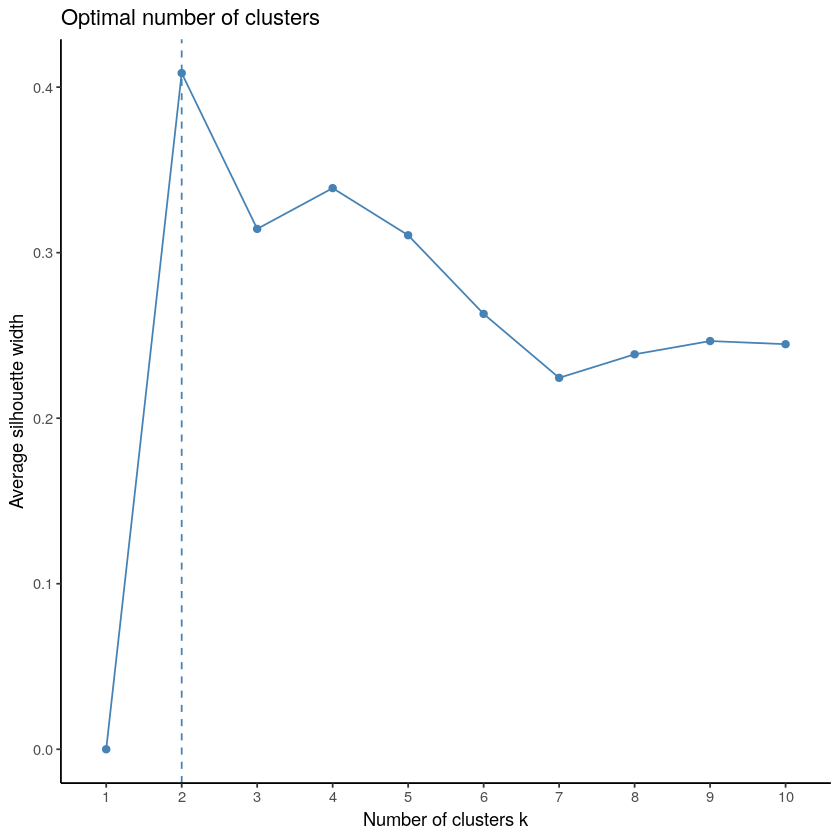

In [5]:
fviz_nbclust(df, pam, method = "silhouette")+
            theme_classic()

In [6]:
pam.res <- pam(df, 2)
print(pam.res)

Medoids:
           ID     Murder    Assault   UrbanPop       Rape
New Mexico 31  0.8292944  1.3708088  0.3081225  1.1603196
Nebraska   27 -0.8008247 -0.8250772 -0.2445636 -0.5052109
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana       Nebraska         

In [7]:
dd <- cbind(USArrests, cluster = pam.res$cluster)
head(dd, n = 3)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1


In [8]:
# podemos acessar quais são os medoids 
pam.res$medoids

,Murder,Assault,UrbanPop,Rape
New Mexico,0.8292944,1.3708088,0.3081225,1.1603196
Nebraska,-0.8008247,-0.8250772,-0.2445636,-0.5052109


### Visualizing PAM clusters

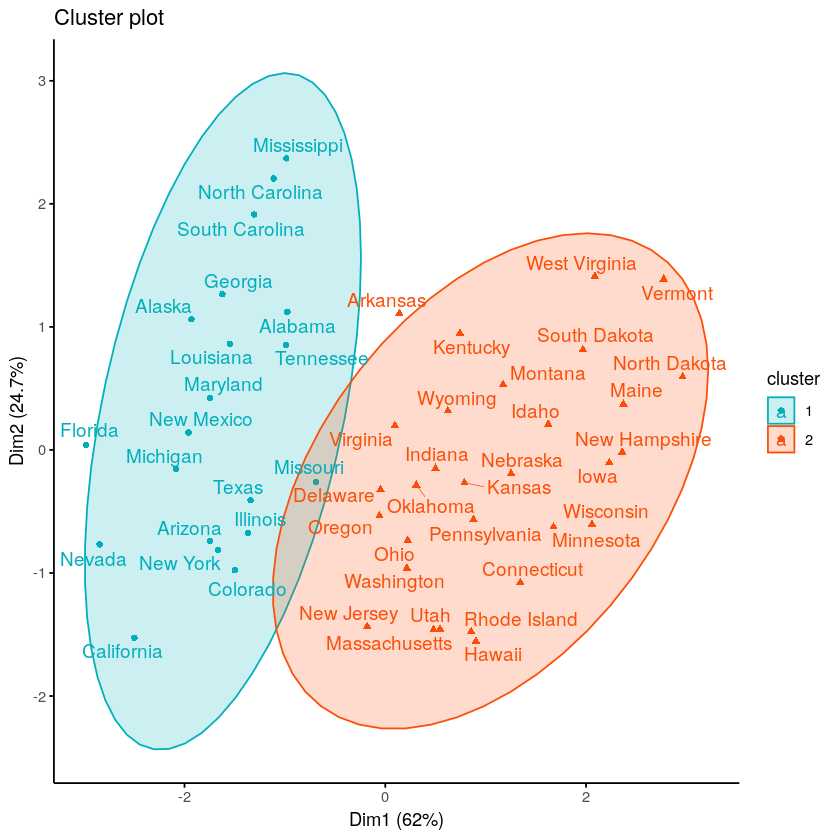

In [9]:
fviz_cluster(pam.res,
    palette = c("#00AFBB", "#FC4E07"), # color palette
    ellipse.type = "t", # Concentration ellipse
    repel = TRUE, # Avoid label overplotting (slow)
    ggtheme = theme_classic()
)